In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
import string
import re

In [2]:
def process_tweet(tweet):
    """
    Parameters:
    -----------
        tweet: string
        
    Returns:
    --------
        tweet_stem: list of stemmed words in tweet
    """
    tokenizer=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    stopwords_english=stopwords.words('english')
    stemmer=PorterStemmer()
    
    tweet=re.sub(r'https://[^\s\n\r]+','',tweet)
    tweet=re.sub(r'#','',tweet)
    tweet_tokenized=tokenizer.tokenize(tweet)
    
    tweet_clean=[]
    for word in tweet_tokenized:
        if word not in stopwords_english and word not in string.punctuation:
            tweet_clean.append(word)
    
    tweet_stem=[]
    for word in tweet_clean:
        stem_word=stemmer.stem(word)
        tweet_stem.append(stem_word)
    
    return tweet_stem

In [3]:
def build_freqs(tweets,ys):
    """
    Parameters:
    -----------
        tweets: list of tweets
    
        ys: m x 1 array with the sentiment label (1 or 0)
    
    Returns:
    --------
        freqs: dict mapping each (word,sentiment) pair to its frequency
    """
    yslist=np.squeeze(ys).tolist()
    freqs={}
    for y,tweet in zip(yslist,tweets):
        for word in process_tweet(tweet):
            pair=(word,y)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair]=1
    return freqs

In [4]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pk764\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
positive_tweets=twitter_samples.strings('positive_tweets.json')
negative_tweets=twitter_samples.strings('negative_tweets.json')
print('positive: ',len(positive_tweets))
print('negative: ',len(negative_tweets))
tweets=positive_tweets+negative_tweets

positive:  5000
negative:  5000


In [6]:
labels=np.append(np.ones(len(positive_tweets)),np.zeros(len(negative_tweets)))

In [7]:
freqs=build_freqs(tweets,labels)
print('len(freqs): ',len(freqs))

len(freqs):  14314


In [19]:
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3691,
 ('hey', 1.0): 77,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 99,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 643,
 ('listen', 1.0): 17,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 131,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('http://t.co/ebz0l2venm', 1.0): 1,
 ('like', 1.0): 233,
 ('k

In [8]:
keys=['happi','merri','nice','good','bad','sad','mad','pretti','song','idea','power','play','magnific',':)',':(',':/']

In [9]:
data=[]
for word in keys:
    pos=0
    neg=0
    if (word,1) in freqs:
        pos=freqs[(word,1)]
    if (word,0) in freqs:
        neg=freqs[(word,0)]
    data.append([word,pos,neg])
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['pretti', 20, 15],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0],
 [':)', 3691, 2],
 [':(', 1, 4585],
 [':/', 5, 11]]

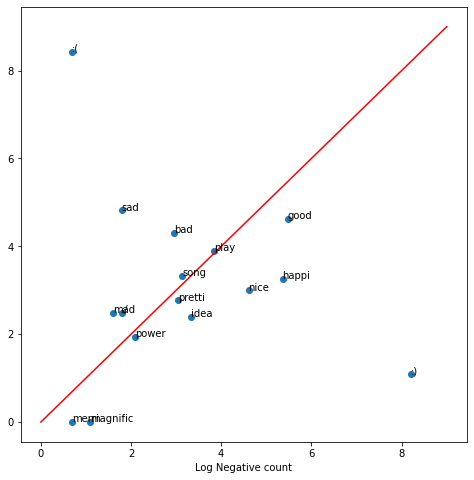

In [12]:
plt.figure(figsize=(8,8))
# we plot in in a log scale since there are very big differences between numbers
x=np.log([x[1]+1 for x in data])
y=np.log([x[2]+1 for x in data])
plt.scatter(x,y)
plt.xlabel('Log Positive count')
plt.xlabel('Log Negative count')
for i in range(0,len(data)):
    plt.annotate(data[i][0],(x[i],y[i]))
plt.plot([0,9],[0,9],color='red')

#### task

Build own build_freqs function

In [14]:
tweets[0]

'#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)'

In [15]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [20]:
def my_build_freqs(tweets,labels):
    freqs={}
    for (tweet,label) in zip(tweets,labels):
        tweet=process_tweet(tweet)
        for word in tweet:
            pair=(word,label)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair]=1
    return freqs

In [21]:
freqs=my_build_freqs(tweets,labels)
print('len(freqs): ',len(freqs))

len(freqs):  14314


In [22]:
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3691,
 ('hey', 1.0): 77,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 99,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 643,
 ('listen', 1.0): 17,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 131,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('http://t.co/ebz0l2venm', 1.0): 1,
 ('like', 1.0): 233,
 ('k